# Problem Statement

The dataset consists of monthly totals of international airline passengers from 1995 to 2002. Our main aim is to predict the number of passengers for the next five years using time series forecasting. Prepare a document for each model explaining how many dummy variables you have created and also include the RMSE value for each model.

Lets load our data and libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (12,12)

In [86]:
airlines = pd.read_excel('Airlines Data.xlsx')
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


We have 96 rows and 2 columns

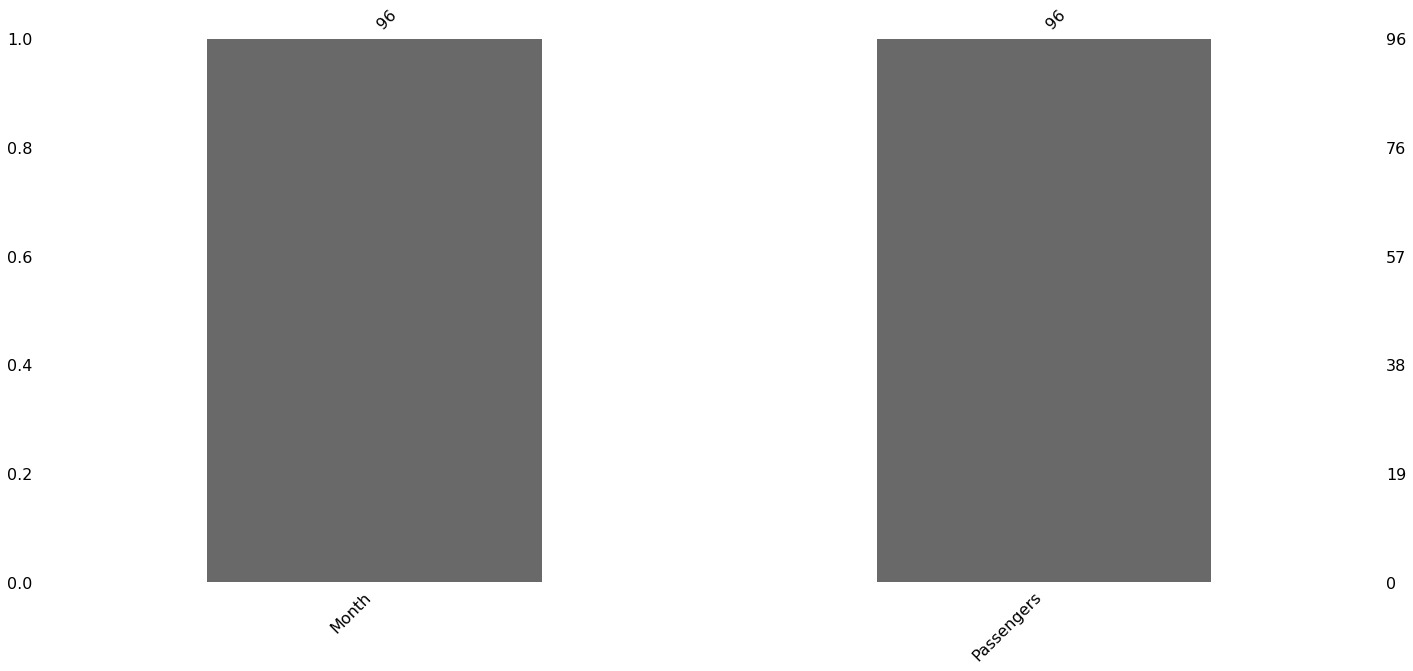

In [87]:
msno.bar(airlines)

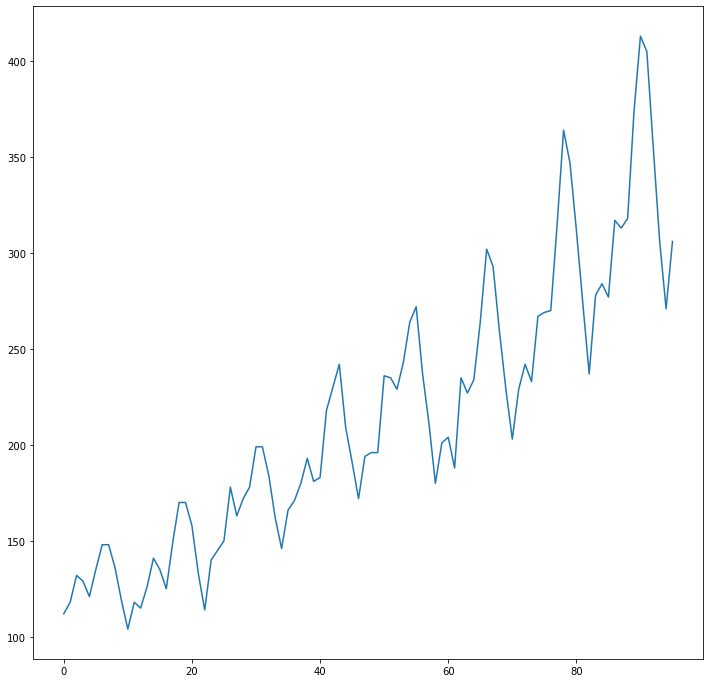

In [88]:
airlines.Passengers.plot()

We see there is an upward trend, with seasonality

In [89]:
airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


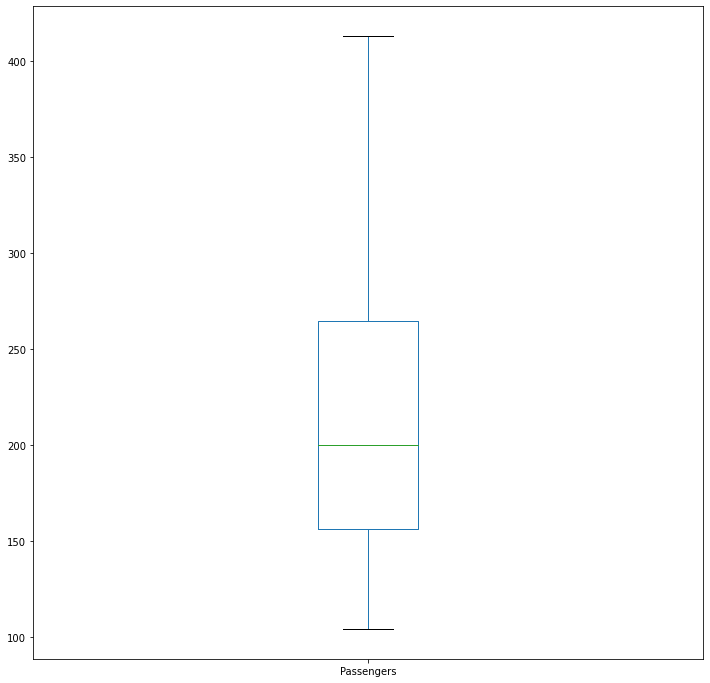

In [90]:
airlines.Passengers.plot(kind='box')

There are no ourliers in our dataset

## Exploratory Data Analysis ##

In [91]:
df = airlines.copy()
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [92]:
# Converting the Month column into proper date time format
dates = pd.date_range(start='1995-01-01', freq='MS',periods=len(df))
dates

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [94]:
df['Month'] = dates.month
df['Year'] = dates.year
df.head()

,Month,Passengers,Year
0,1,112,1995
1,2,118,1995
2,3,132,1995
3,4,129,1995
4,5,121,1995


To get names of the month

In [96]:
import calendar
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
df = df[['Month','Year','Passengers']]
df.head()

,Month,Year,Passengers
0,Jan,1995,112
1,Feb,1995,118
2,Mar,1995,132
3,Apr,1995,129
4,May,1995,121


In [98]:
df['Dates'] = dates
df.set_index('Dates',inplace=True)
df.head()

<ipython-input-98-01d8c42f3d6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dates'] = dates


,Month,Year,Passengers
Dates,,,
1995-01-01,Jan,1995,112
1995-02-01,Feb,1995,118
1995-03-01,Mar,1995,132
1995-04-01,Apr,1995,129
1995-05-01,May,1995,121


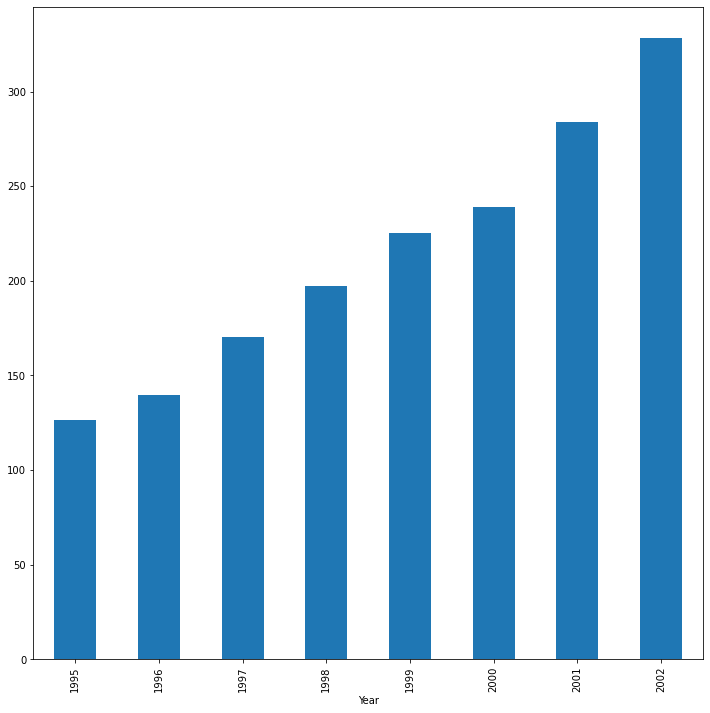

In [99]:
df.groupby('Year')['Passengers'].mean().plot(kind='bar')

From the aboee chart we can see that number of passengers are increasing YoY

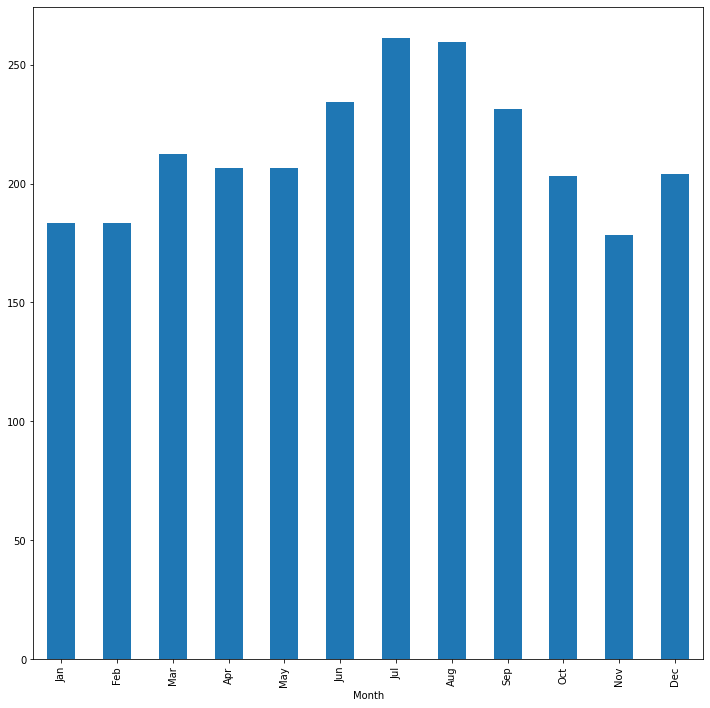

In [100]:
df.groupby('Month')['Passengers'].mean().reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar')

Peak season is between June to Sep, where as Jan, Feb and Nov are non peak time

Lets plot the data to see the decomposition of this data

In [103]:
passengers_count = df['Passengers']
passengers_count

Dates
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [107]:
decompose = sm.tsa.seasonal_decompose(passengers_count,model='multiplicative', extrapolate_trend=8)

Text(0.5, 0.98, 'Decomposition Chart of Airline Data')

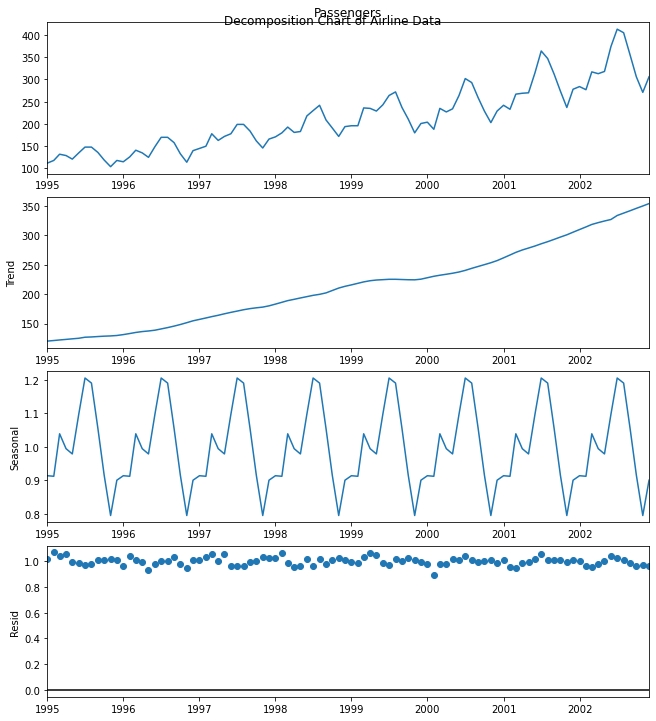

In [110]:
fig = decompose.plot()
fig.set_figheight(10)
fig.set_figwidth(9)
fig.suptitle('Decomposition Chart of Airline Data')

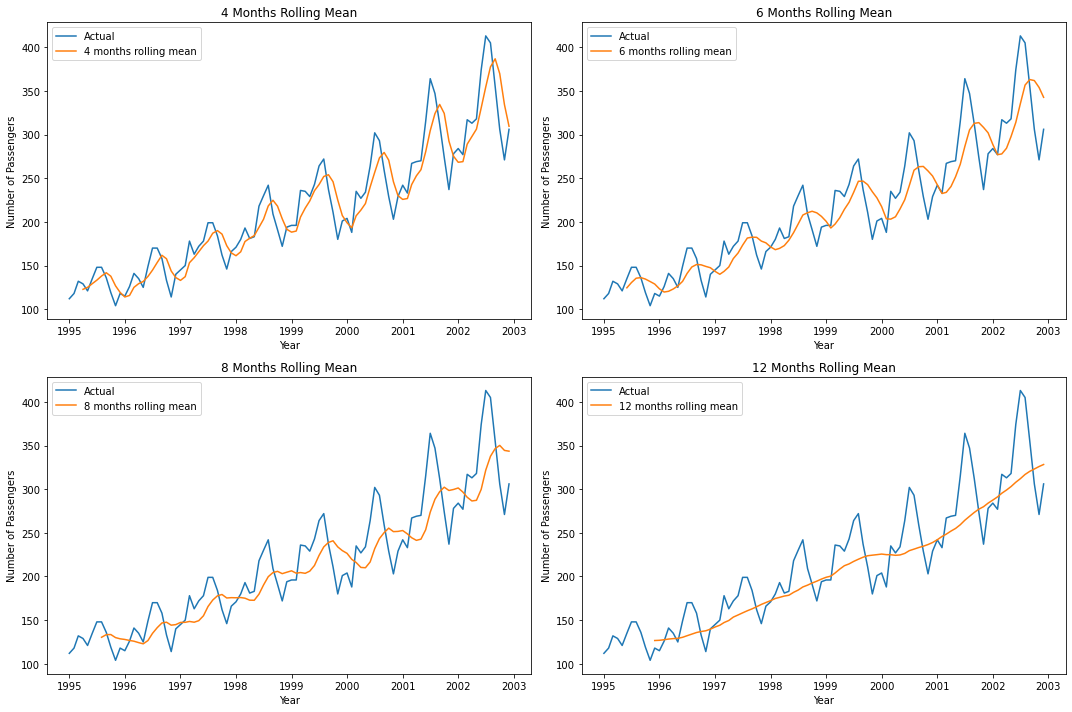

In [111]:
fig,axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0][0].plot(df.index,passengers_count,label='Actual')
axes[0][0].plot(df.index,passengers_count.rolling(window=4).mean(),label='4 months rolling mean')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Number of Passengers')
axes[0][0].set_title('4 Months Rolling Mean')
axes[0][0].legend(loc='best')


axes[0][1].plot(df.index,passengers_count,label='Actual')
axes[0][1].plot(df.index,passengers_count.rolling(window=6).mean(),label='6 months rolling mean')
axes[0][1].set_xlabel('Year')
axes[0][1].set_ylabel('Number of Passengers')
axes[0][1].set_title('6 Months Rolling Mean')
axes[0][1].legend(loc='best')



axes[1][0].plot(df.index,passengers_count,label='Actual')
axes[1][0].plot(df.index,passengers_count.rolling(window=8).mean(),label='8 months rolling mean')
axes[1][0].set_xlabel('Year')
axes[1][0].set_ylabel('Number of Passengers')
axes[1][0].set_title('8 Months Rolling Mean')
axes[1][0].legend(loc='best')


axes[1][1].plot(df.index,passengers_count,label='Actual')
axes[1][1].plot(df.index,passengers_count.rolling(window=12).mean(),label='12 months rolling mean')
axes[1][1].set_xlabel('Year')
axes[1][1].set_ylabel('Number of Passengers')
axes[1][1].set_title('12 Months Rolling Mean')
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

In [112]:
# Seasonality

monthly = pd.pivot_table(data=df,values='Passengers',index='Month',columns='Year')
monthly = monthly.reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
monthly

Year,1995,1996,1997,1998,1999,2000,2001,2002
Month,,,,,,,,
Jan,112,115,145,171,196,204,242,284
Feb,118,126,150,180,196,188,233,277
Mar,132,141,178,193,236,235,267,317
Apr,129,135,163,181,235,227,269,313
May,121,125,172,183,229,234,270,318
Jun,135,149,178,218,243,264,315,374
Jul,148,170,199,230,264,302,364,413
Aug,148,170,199,242,272,293,347,405
Sep,136,158,184,209,237,259,312,355


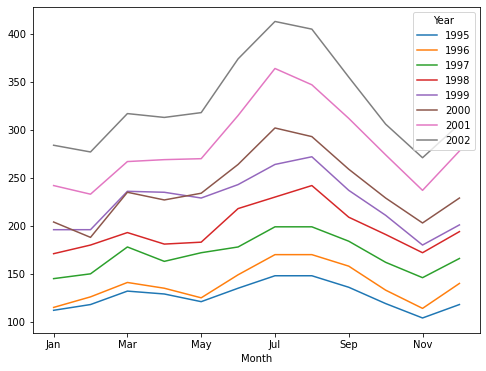

In [113]:
monthly.plot(figsize=(8,6))
plt.show()

In [114]:
yearly = pd.pivot_table(data=df,values='Passengers',index='Year',columns='Month')
yearly = yearly[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
yearly

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1995,112,118,132,129,121,135,148,148,136,119,104,118
1996,115,126,141,135,125,149,170,170,158,133,114,140
1997,145,150,178,163,172,178,199,199,184,162,146,166
1998,171,180,193,181,183,218,230,242,209,191,172,194
1999,196,196,236,235,229,243,264,272,237,211,180,201
2000,204,188,235,227,234,264,302,293,259,229,203,229
2001,242,233,267,269,270,315,364,347,312,274,237,278
2002,284,277,317,313,318,374,413,405,355,306,271,306


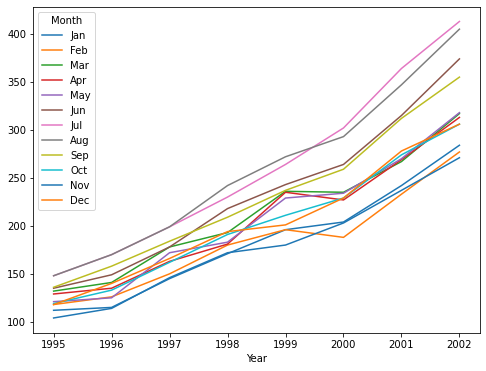

In [115]:
yearly.plot(figsize=(8,6))
plt.show()

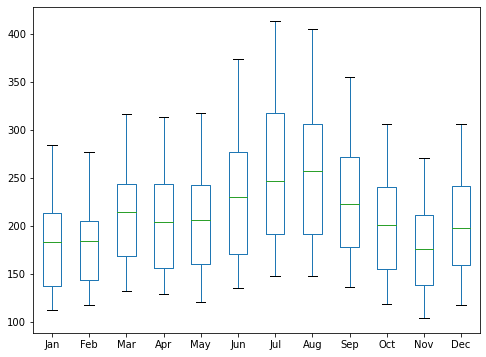

In [116]:
yearly.plot(kind='box',figsize=(8,6))
plt.show()

In [7]:
# pre-processing our data

In [8]:
airlines['t'] = np.arange(1,97)
airlines

,Month,Passengers,t
0,1995-01-01,112,1
1,1995-02-01,118,2
2,1995-03-01,132,3
3,1995-04-01,129,4
4,1995-05-01,121,5
...,...,...,...
91,2002-08-01,405,92
92,2002-09-01,355,93
93,2002-10-01,306,94
94,2002-11-01,271,95


In [9]:
airlines['t_squared'] = airlines['t'] * airlines['t']
airlines['log_passengers'] = np.log(airlines['Passengers'])
airlines

,Month,Passengers,t,t_squared,log_passengers
0,1995-01-01,112,1,1,4.718499
1,1995-02-01,118,2,4,4.770685
2,1995-03-01,132,3,9,4.882802
3,1995-04-01,129,4,16,4.859812
4,1995-05-01,121,5,25,4.795791
...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887
92,2002-09-01,355,93,8649,5.872118
93,2002-10-01,306,94,8836,5.723585
94,2002-11-01,271,95,9025,5.602119


In [10]:
airlines.dtypes

Month             datetime64[ns]
Passengers                 int64
t                          int32
t_squared                  int32
log_passengers           float64
dtype: object

In [11]:
airlines['month'] = pd.DatetimeIndex(airlines['Month']).month
airlines

,Month,Passengers,t,t_squared,log_passengers,month
0,1995-01-01,112,1,1,4.718499,1
1,1995-02-01,118,2,4,4.770685,2
2,1995-03-01,132,3,9,4.882802,3
3,1995-04-01,129,4,16,4.859812,4
4,1995-05-01,121,5,25,4.795791,5
...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887,8
92,2002-09-01,355,93,8649,5.872118,9
93,2002-10-01,306,94,8836,5.723585,10
94,2002-11-01,271,95,9025,5.602119,11


In [12]:
month_dummies = pd.DataFrame(pd.get_dummies(airlines['month']))
airlines1 = pd.concat([airlines,month_dummies],axis=1)
airlines1

,Month,Passengers,t,t_squared,log_passengers,month,1,2,3,4,5,6,7,8,9,10,11,12
0,1995-01-01,112,1,1,4.718499,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,4.770685,2,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,4.882802,3,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,4,16,4.859812,4,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,4.795791,5,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887,8,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,93,8649,5.872118,9,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,94,8836,5.723585,10,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,95,9025,5.602119,11,0,0,0,0,0,0,0,0,0,0,1,0


In [33]:
airlines1.rename(columns={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace=True)
airlines1

,Month,Passengers,t,t_squared,log_passengers,month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,1,1,4.718499,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,4.770685,2,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,4.882802,3,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,4,16,4.859812,4,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,4.795791,5,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887,8,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,93,8649,5.872118,9,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,94,8836,5.723585,10,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,95,9025,5.602119,11,0,0,0,0,0,0,0,0,0,0,1,0


In [34]:
airlines1.columns

Index(['Month', 'Passengers', 't', 't_squared', 'log_passengers', 'month',
       'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object')

We will now do data partiction

In [35]:
airlines1.shape

(96, 18)

In [36]:
train = airlines1.head(84)
test = airlines1.tail(12)
print(train.shape, test.shape)

(84, 18) (12, 18)


### Linear Model ###

In [18]:
import statsmodels.formula.api as smf

In [37]:
test.set_index(np.arange(1,13))

,Month,Passengers,t,t_squared,log_passengers,month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,2002-01-01,284,85,7225,5.648974,1,1,0,0,0,0,0,0,0,0,0,0,0
2,2002-02-01,277,86,7396,5.624018,2,0,1,0,0,0,0,0,0,0,0,0,0
3,2002-03-01,317,87,7569,5.758902,3,0,0,1,0,0,0,0,0,0,0,0,0
4,2002-04-01,313,88,7744,5.746203,4,0,0,0,1,0,0,0,0,0,0,0,0
5,2002-05-01,318,89,7921,5.762051,5,0,0,0,0,1,0,0,0,0,0,0,0
6,2002-06-01,374,90,8100,5.924256,6,0,0,0,0,0,1,0,0,0,0,0,0
7,2002-07-01,413,91,8281,6.023448,7,0,0,0,0,0,0,1,0,0,0,0,0
8,2002-08-01,405,92,8464,6.003887,8,0,0,0,0,0,0,0,1,0,0,0,0
9,2002-09-01,355,93,8649,5.872118,9,0,0,0,0,0,0,0,0,1,0,0,0
10,2002-10-01,306,94,8836,5.723585,10,0,0,0,0,0,0,0,0,0,1,0,0


In [38]:
linear_model = smf.ols('Passengers ~ t',data = train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

53.19923653480271

### Exponential Model ###

In [39]:
exp = smf.ols('log_passengers ~ t', data = train).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

46.05736110315635

### Quadratic Model ###

In [40]:
quad = smf.ols('Passengers ~ t + t_squared',data=train).fit()
pred_quad = pd.Series(quad.predict(test[['t','t_squared']]))
rmse_quad = np.sqrt(np.mean((np.array(test['Passengers']) - np.array(pred_quad))**2))
rmse_quad

48.05188897933164

### Additive Seasonality ###

In [41]:
add_sea = smf.ols('Passengers ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.81978481421817

### Multiplicative Seasonality ###

In [42]:
mul_sea = smf.ols('log_passengers ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mul_sea = pd.Series(mul_sea.predict(test))
rmse_mul_sea = np.sqrt(np.mean((np.array(test['Passengers']) - np.array(np.exp(pred_mul_sea)))**2))
rmse_mul_sea

140.0632020470862

### Additive Seasonality Quadratic Trend ### 

In [43]:
add_sea_quad = smf.ols('Passengers ~ t+t_squared +Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.36081761209504

### Multiplicative Seasonality Linear Trend ###

In [44]:
mul_add_sea = smf.ols('log_passengers ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mul_add_sea = pd.Series(mul_add_sea.predict(test))
rmse_mul_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mul_add_sea)))**2))
rmse_mul_add_sea

10.519172544323887

In [54]:
np.exp(pred_mul_add_sea)

84    279.259237
85    283.647937
86    327.699745
87    316.197279
88    313.139118
89    352.485470
90    392.396393
91    392.543731
92    352.653113
93    310.444392
94    272.127554
95    312.614872
dtype: float64

Lets check the best model and apply it on our whole data

In [48]:
data = {'Model':pd.Series(['rmse_linear','rmse_exp','rmse_quad','rmse_add_sea','rmse_mul_sea','rmse_add_sea_quad','rmse_mul_add_sea']),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_mul_sea,rmse_add_sea_quad,rmse_mul_add_sea])}
table_rmse = pd.DataFrame(data)
table_rmse

,Model,RMSE_Values
0,rmse_linear,53.199237
1,rmse_exp,46.057361
2,rmse_quad,48.051889
3,rmse_add_sea,132.819785
4,rmse_mul_sea,140.063202
5,rmse_add_sea_quad,26.360818
6,rmse_mul_add_sea,10.519173


`RMSE_Mul_Add_Sea` has the least RMSE value compared to all other values

We will use this model on our whole data and predict new values

In [69]:
predict_data = pd.read_excel('Airlines_Forecast.xlsx')

In [70]:
model_full = smf.ols('log_passengers ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=airlines1).fit()
pred_new = pd.Series(model_full.predict(predict_data))
np.exp(pred_new) # since we are using log values

0     320.779889
1     324.173779
2     374.075905
3     361.986306
4     359.632793
5     407.045777
6     452.677464
7     451.720349
8     404.569872
9     355.211286
10    311.768944
11    357.383375
12    367.043091
13    370.926451
14    428.025513
15    414.192340
16    411.499400
17    465.750333
18    517.963068
19    516.867917
20    462.917350
21    406.440219
22    356.732578
23    408.925568
24    419.978419
25    424.421841
26    489.755787
27    473.927580
28    470.846262
29    532.921320
30    592.664229
31    591.411134
32    529.679761
33    465.057441
34    408.180913
35    467.901230
36    480.548133
37    485.632390
38    560.388865
39    542.277898
40    538.752189
41    609.779775
42    678.138867
43    676.705049
44    606.070715
45    532.128498
46    467.049180
47    535.382421
48    549.853274
49    555.670788
50    641.208717
51    620.485768
52    616.451577
53    697.722834
54    775.940744
55    774.300140
56    693.478850
57    608.872611
58    534.4074

In [71]:
predict_data['Forecasted_Numbers'] = pd.Series(np.exp(pred_new))
predict_data

,Month,t,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Forecasted_Numbers
0,2003-01-01,97,1,0,0,0,0,0,0,0,0,0,0,0,320.779889
1,2003-02-01,98,0,1,0,0,0,0,0,0,0,0,0,0,324.173779
2,2003-03-01,99,0,0,1,0,0,0,0,0,0,0,0,0,374.075905
3,2003-04-01,100,0,0,0,1,0,0,0,0,0,0,0,0,361.986306
4,2003-05-01,101,0,0,0,0,1,0,0,0,0,0,0,0,359.632793
5,2003-06-01,102,0,0,0,0,0,1,0,0,0,0,0,0,407.045777
6,2003-07-01,103,0,0,0,0,0,0,1,0,0,0,0,0,452.677464
7,2003-08-01,104,0,0,0,0,0,0,0,1,0,0,0,0,451.720349
8,2003-09-01,105,0,0,0,0,0,0,0,0,1,0,0,0,404.569872
9,2003-10-01,106,0,0,0,0,0,0,0,0,0,1,0,0,355.211286


#### Auto-Regression Model ####

In [72]:
full_res = airlines1.Passengers - model_full.predict(airlines1)
full_res

0     107.307037
1     113.296513
2     127.153334
3     124.186186
4     116.192709
         ...    
91    399.021661
92    349.131900
93    300.262011
94    265.392462
95    300.255915
Length: 96, dtype: float64

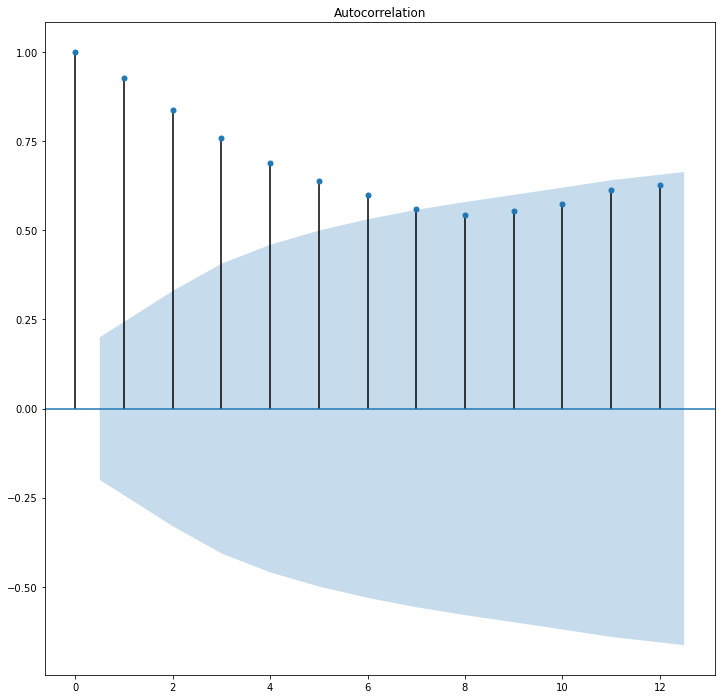

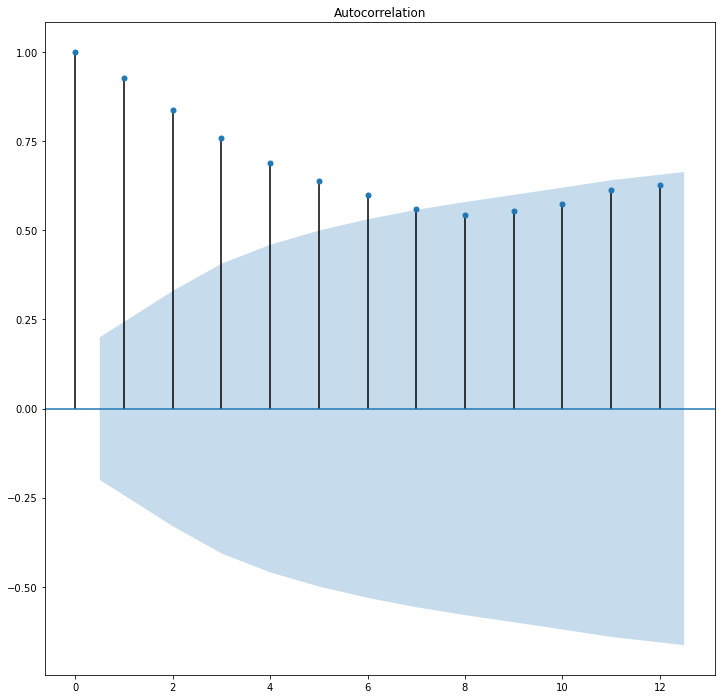

In [73]:
# ACF Plot on residuals

import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(full_res, lags=12)

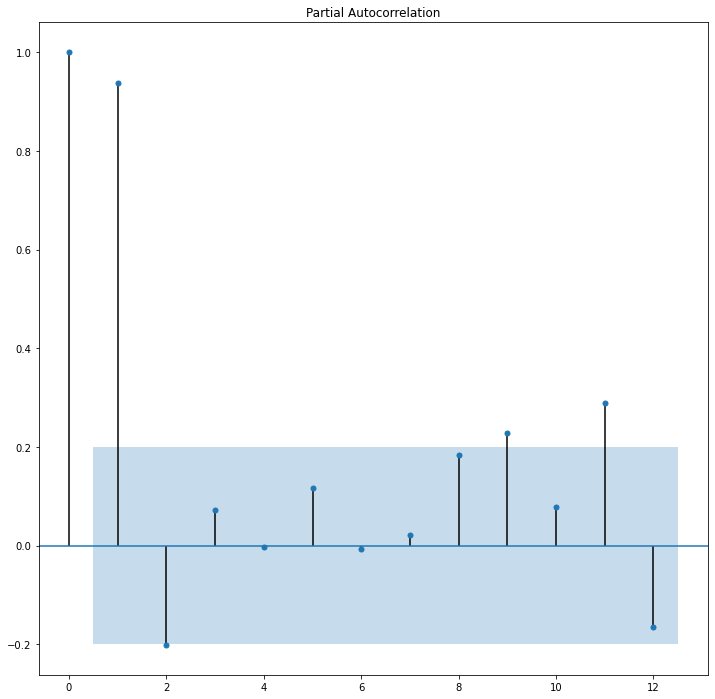

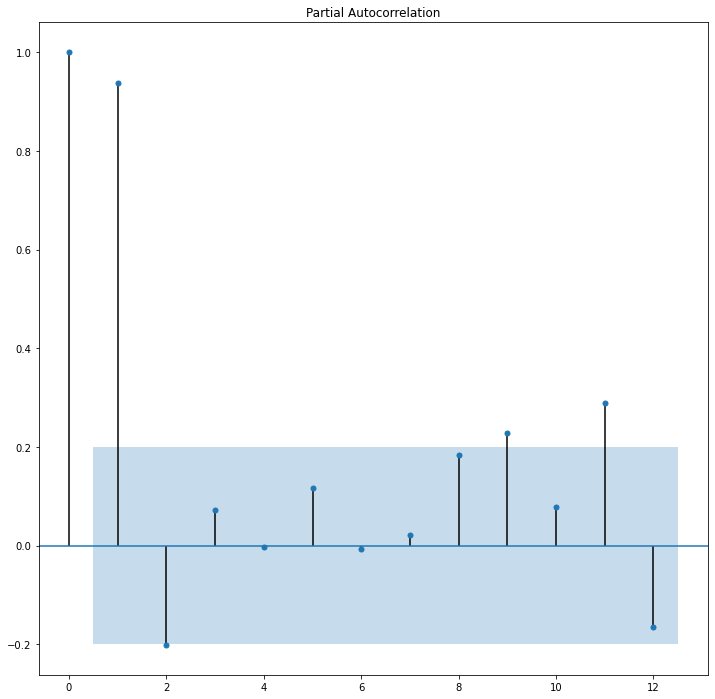

In [74]:
tsa_plots.plot_pacf(full_res, lags=12)

In [75]:
# AR model
from statsmodels.tsa.ar_model import AutoReg
model_ar = AutoReg(full_res, lags=[1])
# model_ar = AutoReg(Train_res, lags=12)
model_fit = model_ar.fit()

In [76]:
print('Coefficients: %s' % model_fit.params)

Coefficients: intercept    13.465404
y.L1          0.944877
dtype: float64


In [77]:
pred_res = model_fit.predict(start=len(full_res), end=len(full_res)+len(predict_data)-1, dynamic=False)
pred_res.reset_index(drop=True, inplace=True)

In [81]:
# The Final Predictions using ASQT and AR(1) Model
final_pred = np.exp(pred_new) + pred_res
final_pred

0      617.950080
1      618.428342
2      665.575559
3      650.882912
4      646.069838
5      691.158842
6      734.594654
7      731.562708
8      682.451771
9      631.240794
10     586.048169
11     630.008800
12     638.105879
13     640.512739
14     696.216692
15     681.065312
16     677.126830
17     730.200879
18     781.301604
19     779.155741
20     724.212380
21     666.797182
22     616.203183
23     667.558675
24     677.820192
25     681.515902
26     746.143353
27     729.647594
28     725.935523
29     787.414597
30     846.594374
31     844.809189
32     782.575057
33     717.477692
34     660.152305
35     719.448505
36     731.694670
37     736.400279
38     810.798979
39     792.349958
40     788.504829
41     859.230604
42     927.304521
43     925.601249
44     854.712313
45     780.529529
46     715.222904
47     783.341370
48     797.609285
49     803.235048
50     888.591797
51     867.697655
52     863.501707
53     944.620124
54    1022.693619
55    1020

In [82]:
predict_data['Forecasted_Numbers_With_Residuals'] = pd.Series(final_pred)
predict_data

,Month,t,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Forecasted_Numbers,Forecasted_Numbers_With_Residuals
0,2003-01-01,97,1,0,0,0,0,0,0,0,0,0,0,0,320.779889,617.950080
1,2003-02-01,98,0,1,0,0,0,0,0,0,0,0,0,0,324.173779,618.428342
2,2003-03-01,99,0,0,1,0,0,0,0,0,0,0,0,0,374.075905,665.575559
3,2003-04-01,100,0,0,0,1,0,0,0,0,0,0,0,0,361.986306,650.882912
4,2003-05-01,101,0,0,0,0,1,0,0,0,0,0,0,0,359.632793,646.069838
5,2003-06-01,102,0,0,0,0,0,1,0,0,0,0,0,0,407.045777,691.158842
6,2003-07-01,103,0,0,0,0,0,0,1,0,0,0,0,0,452.677464,734.594654
7,2003-08-01,104,0,0,0,0,0,0,0,1,0,0,0,0,451.720349,731.562708
8,2003-09-01,105,0,0,0,0,0,0,0,0,1,0,0,0,404.569872,682.451771
9,2003-10-01,106,0,0,0,0,0,0,0,0,0,1,0,0,355.211286,631.240794
